## 2022-01-28 A closer look at `oBEvoAI` wrt prio assertion and short-stopping

Results below are for commit: ###

(Rerunning the code below for other commits is not likely/guaranteed to give the same results.)

I have now:
* Added support for getting value breakdown info when plotting snapshots for non-affordance-based models. This meant some minor code reorganisation in `sc_scenario.SCAgent.get_value_of_state_for_agent()`, which shouldn't alter model behaviour at all, but I will do some tests below to test this.
* Moved the plotting functions I implemented in yesterday's (2022-01-27) diary notebook into `do_2...` for easier reuse.

# Init

In [1]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
parent_path = str(Path('.').absolute().parent)
if not (parent_path in sys.path):
    sys.path.append(parent_path)
    sys.path.append(parent_path + '/SCPaper')
print(sys.path)

# imports needed to run the simulations
import os, contextlib
import numpy as np
import do_2_analyse_deterministic_fits
from do_2_analyse_deterministic_fits import get_max_crit_parameterisations, plot_example

# run do_2... without any plots or stdout (https://stackoverflow.com/questions/2828953/silence-the-stdout-of-a-function-in-python-without-trashing-sys-stdout-and-resto)
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        do_2_analyse_deterministic_fits.DO_PLOTS = False
        det_fits = do_2_analyse_deterministic_fits.do()

['C:\\GITHUB\\COMMOTIONSFramework\\diary notebooks', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\python39.zip', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\DLLs', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64', '', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\Pythonwin', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tragma\\.ipython', 'C:\\GITHUB\\COMMOTIONSFramework', 'C:\\GITHUB\\COMMOTIONSFramework/SCPaper']


 ## Rerunning the same non-affordance-based simulations as in yesterday's notes
 
As can be seen below I am getting back the same results as in yesterday's (2022-01-27) notes, so all seems good wrt the small snapshot-related changes I made in `sc_scenario.SCAgent`.

****** Plotting model "" with parameters {'k_c': 0.25830993300297683, 'k_sc': 0.020000000000000004}, achieving:
{'Vehicle asserting priority': False, 'Vehicle short-stopping': False, 'Pedestrian hesitation in deceleration scenario': True, 'Pedestrian starting before vehicle at full stop': True}
{'Pedestrian hesitation in constant-speed scenario': False}
*** VehPrioAssert
	Stored metric values across kinematic variants: [13.88888889 13.88888889 13.88888889]
	Simulating kinematic variant 0... Metric VehPrioAssert_veh_av_speed = 13.88888888888889
*** VehShortStop
	Stored metric values across kinematic variants: [0.36180262 0.1221355  0.2852244 ]
	Simulating kinematic variant 0... Metric VehShortStop_veh_av_surpl_dec = 0.3618026197182067
*** PedHesitateVehConst
	Stored metric values across kinematic variants: [1.3 1.3 1.3]
	Simulating kinematic variant 0... Metric PedHesitateVehConst_ped_av_speed = 1.3
*** PedHesitateVehYield
	Stored metric values across kinematic variants: [1.10555556 1.3

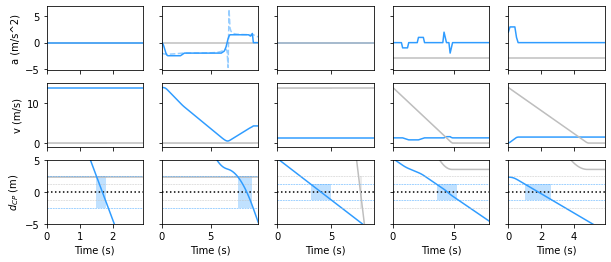

In [2]:
fit = det_fits['']
idx_best = get_max_crit_parameterisations(fit)
plot_example(fit, idx_example=idx_best[0])

****** Plotting model "oBEo" with parameters {'k_c': 2.0, 'k_sc': 0.020000000000000004, 'T_Of': 0.5, 'sigma_O': 0.43088693800637673}, achieving:
{'Vehicle asserting priority': False, 'Vehicle short-stopping': False, 'Pedestrian hesitation in deceleration scenario': True, 'Pedestrian starting before vehicle at full stop': True}
{'Pedestrian hesitation in constant-speed scenario': True}
*** VehPrioAssert
	Stored metric values across kinematic variants: [13.88888889 13.88888889 13.88888889]
	Simulating kinematic variant 0... Metric VehPrioAssert_veh_av_speed = 13.88888888888889
*** VehShortStop
	Stored metric values across kinematic variants: [0.3916182  0.14500681 0.2852244 ]
	Simulating kinematic variant 0... Metric VehShortStop_veh_av_surpl_dec = 0.39161820010457027
*** PedHesitateVehConst
	Stored metric values across kinematic variants: [1.26875    1.         1.21176471]
	Simulating kinematic variant 1... Metric PedHesitateVehConst_ped_av_speed = 1.088888888888889
*** PedHesitateVehYi

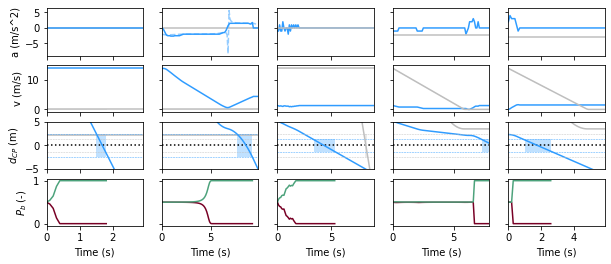

In [3]:
def get_min_ped_hes_speed_example(fit): 
    hes_speeds = fit.get_metric_results('PedHesitateVehConst_ped_av_speed')
    min_hes_speeds = np.amin(hes_speeds, axis=1)
    idx_example = np.argmin(min_hes_speeds)
    return idx_example

fit = det_fits['oBEo']
idx_example = get_min_ped_hes_speed_example(fit)
plot_example(fit, idx_example)

****** Plotting model "oBEvoAI" with parameters {'k_c': 0.4308869380063768, 'k_sc': 0.020000000000000004, 'beta_V': 1.0}, achieving:
{'Vehicle asserting priority': False, 'Vehicle short-stopping': False, 'Pedestrian hesitation in deceleration scenario': True, 'Pedestrian starting before vehicle at full stop': True}
{'Pedestrian hesitation in constant-speed scenario': False}
*** VehPrioAssert
	Stored metric values across kinematic variants: [13.88888889 13.88888889 13.88888889]
	Simulating kinematic variant 0... Metric VehPrioAssert_veh_av_speed = 13.88888888888889
*** VehShortStop
	Stored metric values across kinematic variants: [0.3916182  0.14500681 0.2852244 ]
	Simulating kinematic variant 0... Metric VehShortStop_veh_av_surpl_dec = 0.39161820010457027
*** PedHesitateVehConst
	Stored metric values across kinematic variants: [1.3 1.3 1.3]
	Simulating kinematic variant 0... Metric PedHesitateVehConst_ped_av_speed = 1.3
*** PedHesitateVehYield
	Stored metric values across kinematic var

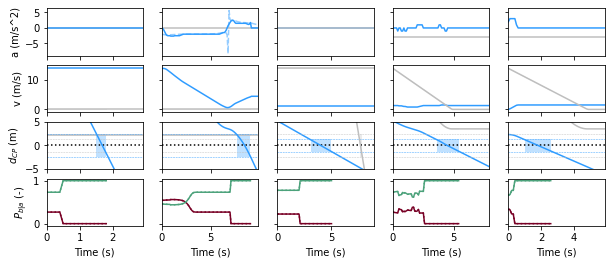

In [4]:
fit = det_fits['oBEvoAI']
idx_best = get_max_crit_parameterisations(fit)
plot_example(fit, idx_example=idx_best[0])

## Why does `oBEvoAI` not achieve priority assertion?

Below simulating all three kinematic variants of the prio assertion scenario with the same `oBEvoAI` parameterisation as above, with snapshots at t = 0 s. What can be seen here is since that the pass-first behaviour acceleration of the pedestrian - by design - clears the crossing with some safety margin, already at the action prediction time point ($T_p$ into the future), there is no collision course (the final value in the value breakdown parenthesis would be nonzero if there was a collision course), regardless of the action of the car.

Looking in further detail at variation 2 (the one where the pedestrian is at the lowest speed at the action prediction time point), then at the action prediction time point the pedestrian has 3.1 m left to conflict space exit, which at 2.04 m/s means 1.52 s left to exit. For the vehicle the distance to entry is 27.5 m which at 14.14 m/s (predicted speed with the highest acceleration increase action) is 1.94 s to entry, i.e., confirming that there is no collision course. To create a collision course, the vehicle would need a speed of 27.5 / 1.52 = 18.1 m/s, i.e., a speed increase of 4.2 m/s over the 0.5 s action prediction interval, i.e., an acceleration of 8.4 m/s<sup>2</sup>, which is quite excessive.

My takeaway from this analysis is that with the current approach to how I define other-agent behaviours, the snapshot (non-affordance-based) value estimation is not capable of priority assertion because the means of "coercion" that is has access to is limited to getting the other agent on a potential collision course, and achieving this precisely for the "snapshotted" future time point would require excessive accelerations, given how behaviour accelerations are defined now. Alternative approaches to achieve priority assertion starting from this type of model would have been:
* Calculating collision courses over an entire prediction horizon, not only the snapshot future action prediction time point - but this steps away from the snapshot type of idea, and sort of gets us into the territory of the affordance-based value estimation anyway.
* Modifying the way other-agent behaviour is estimated, to for example in this case assume a first-passing behaviour of the pedestrian that just accelerates to free speed. I have played around with this idea in the past, but having this instead of the current first-passing behaviour seems undesirable, because it excludes the possibility of the pedestrian hurrying across. And having both the current first-passing behaviour and the "accelerate-to-free-speed" one would seem to add further complexity to the model. See also further below.

*** Variation 0:


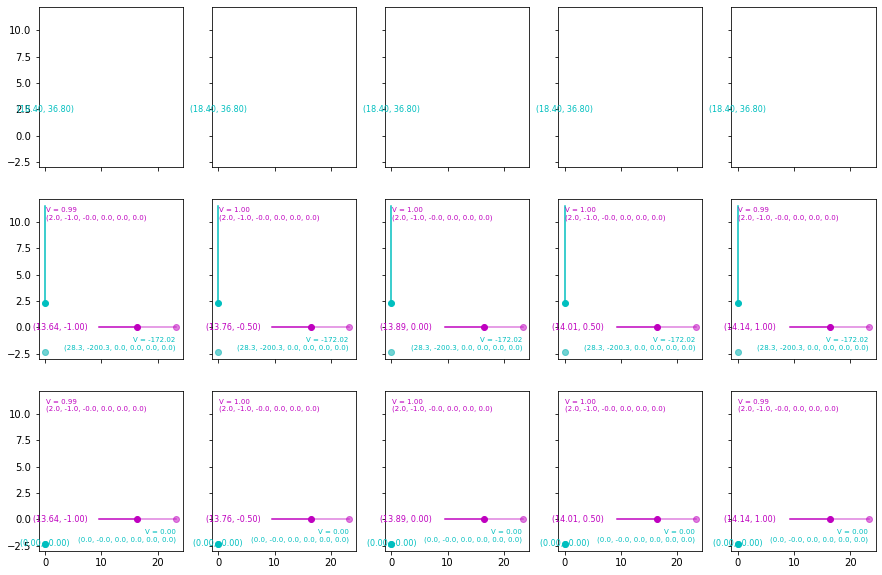

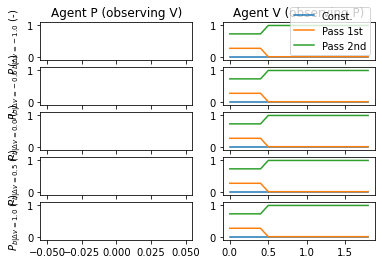

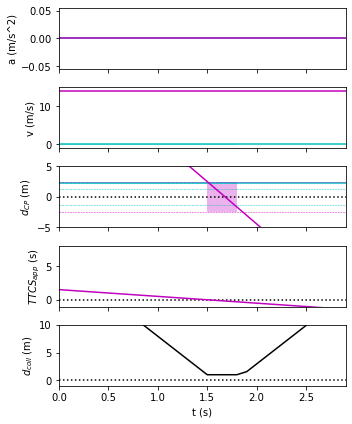


*** Variation 1:


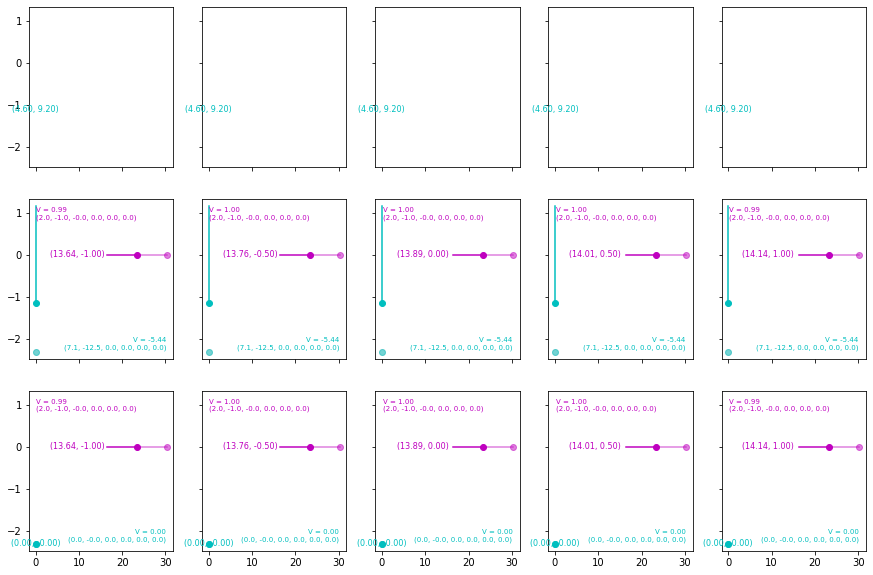

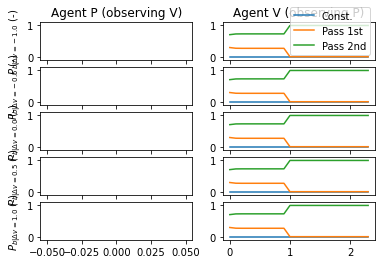

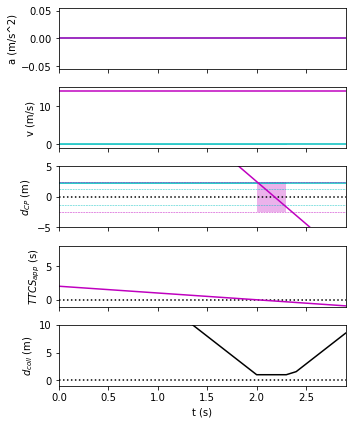


*** Variation 2:


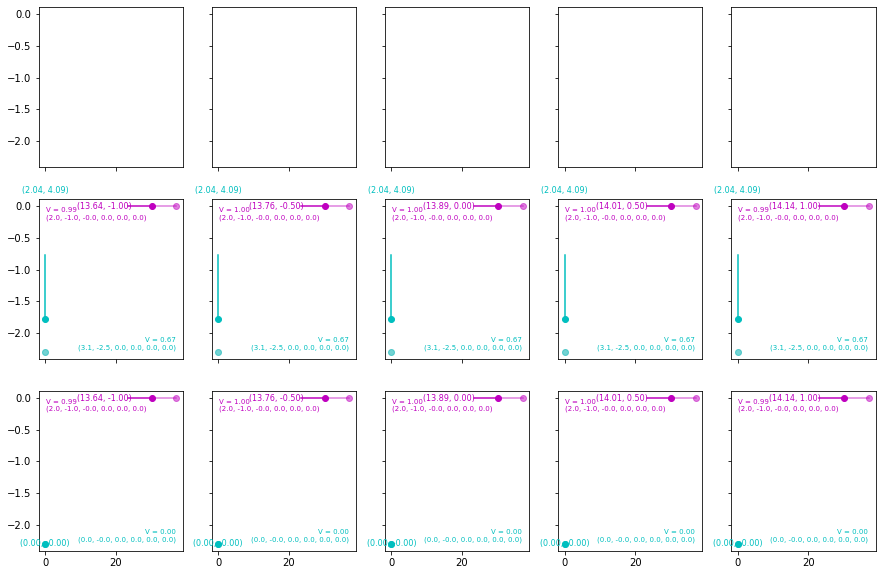

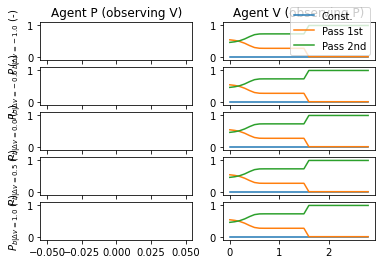

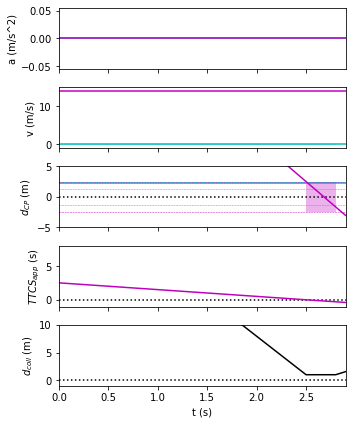

In [5]:
import sc_fitting

def sim_all_variants(scenario_name, veh_snapshot_time):
    scenario = sc_fitting.ONE_AG_SCENARIOS[scenario_name]
    params_array = fit.results.params_matrix[idx_best[0], :]
    params_dict = fit.get_params_dict(params_array)
    for i_variation in range(scenario.n_variations):
        print(f'*** Variation {i_variation}:')
        sim = sc_fitting.construct_model_and_simulate_scenario(
            model_name=fit.name, params_dict=params_dict, scenario=scenario,
            i_variation = i_variation, apply_stop_criteria=False,
            snapshots=(None, (veh_snapshot_time,)))
        sim.do_plots(kinem_states=True, beh_probs=True, veh_stop_dec=(scenario_name=='VehShortStop'))
        print()
        
sim_all_variants('VehPrioAssert', veh_snapshot_time=0)

## Why does `oBEvoAI` not achieve short-stopping?

Again simulating the same `oBEvoAI` model across all kinematic variants, now of the short-stopping scenario, with snapshots at t = 1 s, where the max deceleration tends to have been reached.

In this case, there is a collision course at the action prediction time point for variations 1 and 2. With this model parameterisation, the effect of this collision course is rather small, such that the difference in estimated value for the pedestrian is rather small between different vehicle actions, but at least in theory with other parameterisations this could be made to have an effect on the estimated behaviour probabilities. 

However, the key point here is that for this model, the action values for the vehicle given that the pedestrian adopting its first-passing behaviour are always lower than the action values given that the pedestrian stays put. This is because in this model, there is no concept of what happens beyond the action prediction time point, and of the smaller time loss to the car if the pedestrian starts crossing now rather than later. 

*** Variation 0:


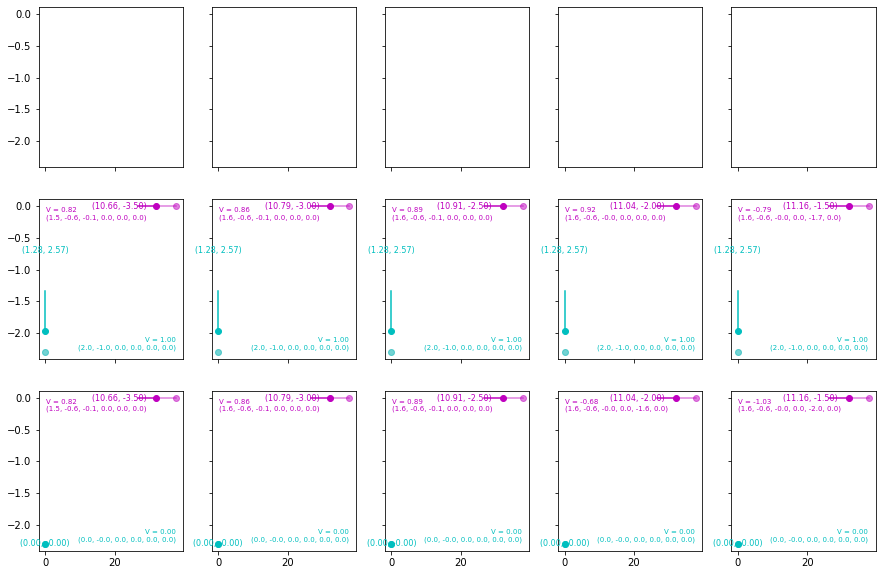

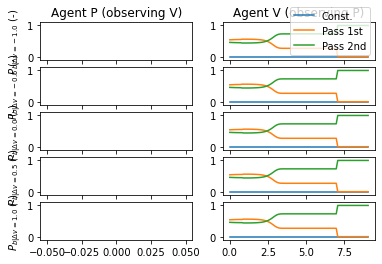

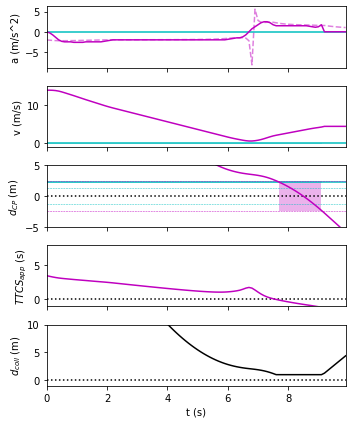


*** Variation 1:


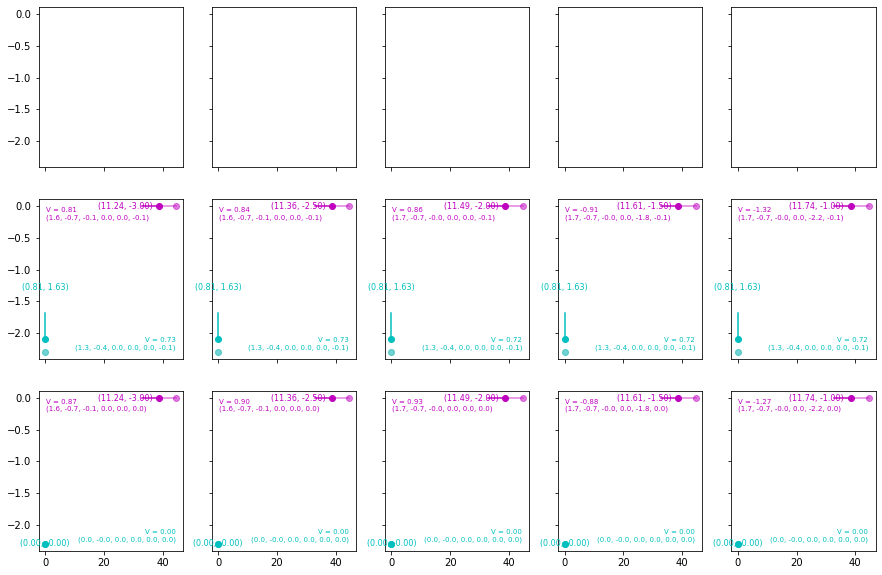

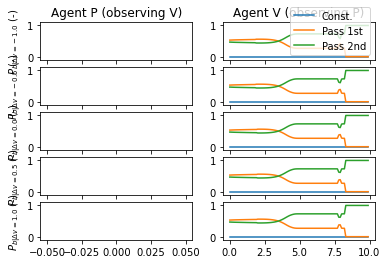

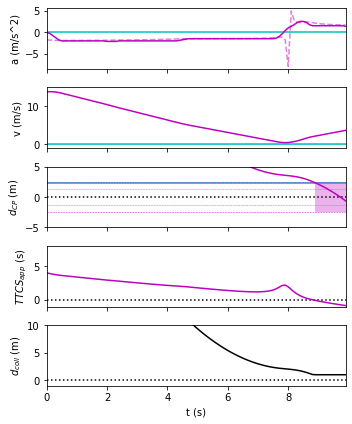


*** Variation 2:


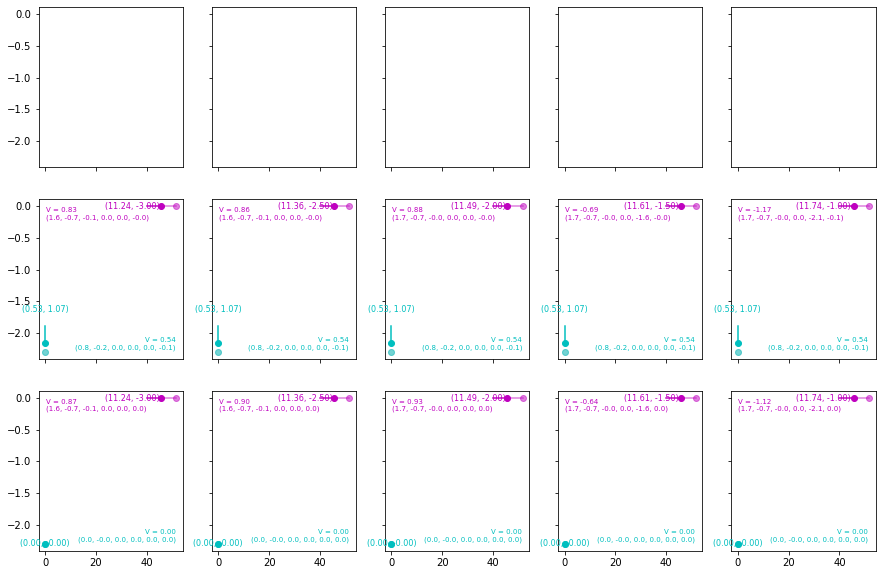

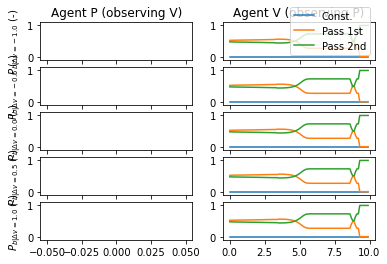

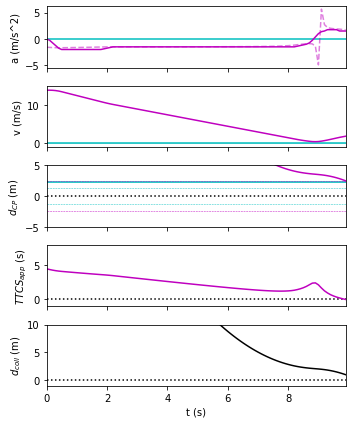

In [6]:
sim_all_variants('VehShortStop', veh_snapshot_time=1)

## Conclusion

In conclusion, the non-affordance-based value estimation approach would seem possible to extend to something which can achieve priority assertion, by introducing some further model assumptions (perhaps most promisingly, an additional behaviour hypothesis, for "accelerate-to-free-speed" behaviour). However, it seems quite clear that the lack of a concept of value further into the future, beyond the action prediction time point means that short-stopping seems to be out of the question with the non-affordance-based, "snapshot" type of value estimation.